<a href="https://colab.research.google.com/github/ella4-boop/patents/blob/main/patentsandgrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [38]:
gdppercapita_df=pd.read_csv('https://raw.githubusercontent.com/ella4-boop/patents/refs/heads/main/gdppercapita2.csv')
gdppercapita_df = gdppercapita_df.pivot(index="country", columns='year', values="gdp/capita")
gdppercapita_df = gdppercapita_df.reset_index()
gdppercapita_df.columns.name = None

gdppercapita_df.tail(50)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
163,Samoa,3990.9268,3891.6300,3861.8890,3986.4539,3854.03930,4077.99100,4333.51270,4325.13800,4386.51900,...,6247.9050,6432.3600,6887.3050,6919.0156,6805.0454,7033.5210,6745.3060,6214.0170,5843.7720,6304.3460
164,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66923.03000,71024.56000,...,58743.5860,59647.6600,60669.8200,59524.5600,59194.0430,60171.0470,55998.0700,64745.1330,70887.5700,NaN
165,Sao Tome and Principe,3883.2043,3844.8965,3798.8835,3771.2861,3788.48360,3802.29130,3801.08150,3784.79030,3828.99830,...,5223.0957,5210.2036,5388.5093,5521.2026,5674.7236,5702.0835,5742.9473,5732.6943,5632.1387,5541.3020
166,Saudi Arabia,60101.5740,62011.6200,61933.6050,59475.7230,57526.95000,55364.84000,54954.16000,54274.51600,53750.04000,...,53396.1520,52983.1370,51997.3440,52431.8400,55508.8750,56365.5080,51782.5700,55768.2340,57351.8750,55055.4000
167,Senegal,2923.3442,2917.0142,2874.0030,2834.0280,2757.86080,2835.03270,2822.46830,2840.60820,2938.69170,...,3484.0122,3593.7947,3710.0554,3871.4514,3998.2864,4070.6123,4018.0413,4173.6772,4227.7334,4317.2266
168,Serbia,NaN,NaN,NaN,NaN,NaN,9550.56100,10147.43600,11088.32700,11728.26600,...,18123.2190,18452.2380,19100.9980,19656.7640,20683.3710,21782.4470,21719.7050,23668.5230,24910.4220,26030.0210
169,Seychelles,15478.8480,15695.6710,16744.5080,17596.8980,16716.52100,16552.45500,17942.17400,19895.14300,19991.22900,...,25379.4180,27032.2090,29905.1350,31595.6680,32841.4260,34346.0700,30056.2000,29979.8280,28540.7620,29468.9510
170,Sierra Leone,2438.6740,2466.9697,2036.2424,2068.8176,2020.76450,1856.40640,1879.95360,1746.79370,1760.56240,...,3348.4453,2601.3052,2702.0269,2737.3628,2766.7170,2851.9792,2751.9666,2848.7060,2934.0300,3034.2190
171,Singapore,45371.0080,47047.6400,48686.6450,52910.3600,56966.02300,59226.75800,61116.67600,64013.56200,60519.71000,...,106604.4900,108483.2100,110927.6950,115831.1100,119343.1500,119572.2700,115304.1500,131864.1000,132468.9400,127543.5550
172,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52439.4730,51375.6000,50817.6800,46088.3600,42154.1000,45996.7930,39265.7600,40507.0660,43877.2500,44894.6950


In [39]:
selected_countries= ["China", "Finland", "India", "Poland", "Brazil", "South Korea", "Russia", "Turkey", "United Kingdom", "United States"]
gdp_df = gdppercapita_df[gdppercapita_df["country"].isin(selected_countries)]
gdp_df.head(11)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
25,Brazil,12633.288,12546.5610,12271.9790,12669.4290,13202.9310,13550.4390,13641.6300,13896.6250,13737.7030,...,19183.1720,18357.068,17620.928,17724.480,17917.750,18018.6210,17327.516,18075.7050,18554.047,19018.238
38,China,1645.579,1773.6394,2001.2543,2253.0520,2518.1548,2763.7998,3006.3628,3250.6145,3472.1785,...,13696.5180,14575.935,15485.213,16461.070,17490.166,18465.2990,18833.785,20406.7300,21011.617,22137.600
66,Finland,39167.863,36663.7600,35251.0500,34807.3320,36031.5800,37414.2200,38657.5550,41008.6170,43130.6880,...,53200.7230,53273.140,54486.460,56154.418,56749.004,57451.6300,55940.074,57350.8700,58024.477,57063.523
86,India,2203.147,2178.6860,2249.6980,2307.6072,2411.4626,2542.4220,2680.2788,2734.5210,2847.9624,...,6079.8438,6488.146,6940.626,7326.607,7714.340,7930.0913,7399.531,8050.0186,8544.688,9160.063
153,Poland,13044.731,12086.6230,12352.6580,12781.8740,13430.0240,14475.3200,15345.7500,16310.8920,17058.6170,...,30863.1200,32252.387,33244.300,34952.836,37136.016,38846.5040,38122.438,41774.5820,44160.860,44384.168
158,Russia,29945.146,28352.4360,24209.0330,22122.2910,19348.2010,18550.5200,17879.9220,18160.2290,17226.2270,...,36217.9650,35393.570,35361.547,35932.234,36908.367,37698.9530,36746.375,38938.4960,38263.617,39753.457
179,South Korea,13883.375,15228.2580,16005.0190,16932.8750,18317.0980,19877.1930,21242.2830,22342.5550,21044.0470,...,41648.2460,42593.008,43674.508,44928.050,46034.290,46903.8400,46506.934,48571.4340,49933.977,50572.250
195,Turkey,12124.939,11999.2900,12390.4870,13110.3910,12282.9720,13035.5470,13788.1590,14620.1520,14764.5920,...,24830.5740,25992.297,26497.135,28117.953,28575.762,28400.7000,28649.550,31637.5300,33061.047,34609.914
202,United Kingdom,35586.742,35085.5080,35131.0940,35919.5820,37206.2070,38047.3600,38930.4900,40742.6050,42006.3500,...,51100.3360,51823.973,52421.082,53449.293,53872.934,54440.1050,48656.164,52872.1950,54805.445,54542.016
203,United States,44378.523,43742.0270,44659.1520,45286.9340,46537.3550,47220.9570,48435.7000,49984.2700,51619.8700,...,63191.2460,64575.406,65275.570,66458.020,68070.210,69511.7660,67352.390,71318.3050,72841.920,74577.510


In [53]:
gdp_df['country'] = gdp_df['country'].replace("Turkey", "Türkiye")
gdp_df.head(11)

<ipython-input-53-65855b79a054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df['country'] = gdp_df['country'].replace("Turkey", "Türkiye")


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
25,Brazil,12633.288,12546.5610,12271.9790,12669.4290,13202.9310,13550.4390,13641.6300,13896.6250,13737.7030,...,19183.1720,18357.068,17620.928,17724.480,17917.750,18018.6210,17327.516,18075.7050,18554.047,19018.238
38,China,1645.579,1773.6394,2001.2543,2253.0520,2518.1548,2763.7998,3006.3628,3250.6145,3472.1785,...,13696.5180,14575.935,15485.213,16461.070,17490.166,18465.2990,18833.785,20406.7300,21011.617,22137.600
66,Finland,39167.863,36663.7600,35251.0500,34807.3320,36031.5800,37414.2200,38657.5550,41008.6170,43130.6880,...,53200.7230,53273.140,54486.460,56154.418,56749.004,57451.6300,55940.074,57350.8700,58024.477,57063.523
86,India,2203.147,2178.6860,2249.6980,2307.6072,2411.4626,2542.4220,2680.2788,2734.5210,2847.9624,...,6079.8438,6488.146,6940.626,7326.607,7714.340,7930.0913,7399.531,8050.0186,8544.688,9160.063
153,Poland,13044.731,12086.6230,12352.6580,12781.8740,13430.0240,14475.3200,15345.7500,16310.8920,17058.6170,...,30863.1200,32252.387,33244.300,34952.836,37136.016,38846.5040,38122.438,41774.5820,44160.860,44384.168
158,Russia,29945.146,28352.4360,24209.0330,22122.2910,19348.2010,18550.5200,17879.9220,18160.2290,17226.2270,...,36217.9650,35393.570,35361.547,35932.234,36908.367,37698.9530,36746.375,38938.4960,38263.617,39753.457
179,South Korea,13883.375,15228.2580,16005.0190,16932.8750,18317.0980,19877.1930,21242.2830,22342.5550,21044.0470,...,41648.2460,42593.008,43674.508,44928.050,46034.290,46903.8400,46506.934,48571.4340,49933.977,50572.250
195,Türkiye,12124.939,11999.2900,12390.4870,13110.3910,12282.9720,13035.5470,13788.1590,14620.1520,14764.5920,...,24830.5740,25992.297,26497.135,28117.953,28575.762,28400.7000,28649.550,31637.5300,33061.047,34609.914
202,United Kingdom,35586.742,35085.5080,35131.0940,35919.5820,37206.2070,38047.3600,38930.4900,40742.6050,42006.3500,...,51100.3360,51823.973,52421.082,53449.293,53872.934,54440.1050,48656.164,52872.1950,54805.445,54542.016
203,United States,44378.523,43742.0270,44659.1520,45286.9340,46537.3550,47220.9570,48435.7000,49984.2700,51619.8700,...,63191.2460,64575.406,65275.570,66458.020,68070.210,69511.7660,67352.390,71318.3050,72841.920,74577.510


In [54]:
gdp_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,20461.333300,19965.678840,19652.142430,19819.136720,20128.598540,20747.777780,21360.81306,22305.108050,22690.823490,23552.16640,...,34001.174380,34532.493000,35100.736900,36150.496100,37046.883900,37766.750930,36553.475700,38899.586560,39920.169500,40581.873900
std,15481.638491,14882.668245,14595.360741,14556.341556,14997.321111,15234.986335,15606.30588,16278.320062,16990.656775,17632.06589,...,18504.823409,18687.562467,18916.986507,19203.612658,19422.449431,19715.706914,18763.167414,19631.385851,19999.155384,19903.548165
min,1645.579000,1773.639400,2001.254300,2253.052000,2411.462600,2542.422000,2680.27880,2734.521000,2847.962400,3041.48270,...,6079.843800,6488.146000,6940.626000,7326.607000,7714.340000,7930.091300,7399.531000,8050.018600,8544.688000,9160.063000
25%,12252.026250,12021.123250,12292.148750,12697.540250,12512.961750,13164.270000,13678.26225,14077.506750,13994.425250,13725.10450,...,20595.022500,20265.875250,19839.979750,20322.848250,20582.253000,20949.149250,21287.726250,23214.430000,24023.974500,25255.678500
50%,13464.053000,13887.409500,14197.753000,15021.633000,15873.561000,16512.920000,16612.83600,17235.560500,17142.422000,18123.59100,...,33540.542500,33822.978500,34302.923500,35442.535000,37022.191500,38272.728500,37434.406500,40356.539000,41212.238500,42068.812500
75%,34176.343000,33402.240000,32400.578750,31636.071750,31860.735250,33029.963250,34303.73700,36142.592500,36765.774250,38182.96225,...,48737.313500,49516.231750,50234.438500,51318.982250,51913.273000,52556.038750,48118.856500,51797.004750,53587.578000,53549.574500
max,44378.523000,43742.027000,44659.152000,45286.934000,46537.355000,47220.957000,48435.70000,49984.270000,51619.870000,53474.04700,...,63191.246000,64575.406000,65275.570000,66458.020000,68070.210000,69511.766000,67352.390000,71318.305000,72841.920000,74577.510000


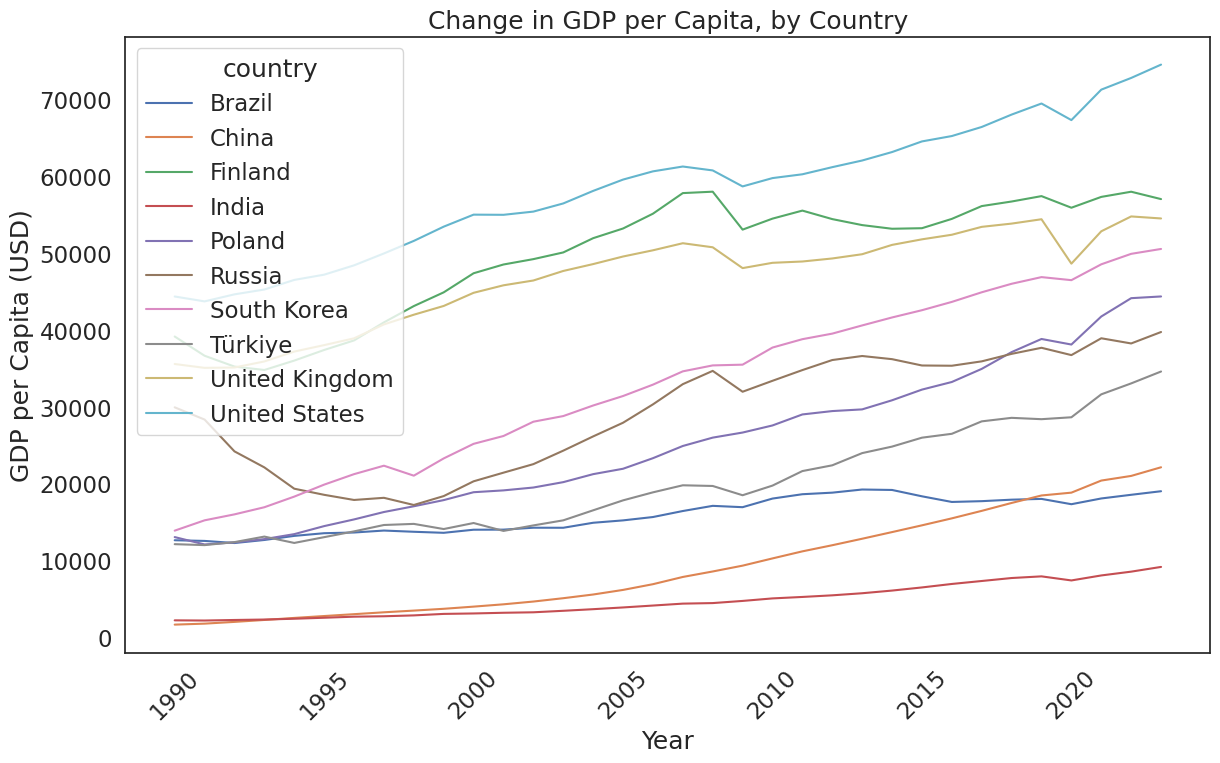

In [57]:
long1_df = gdp_df.melt(id_vars=['country'], var_name='year', value_name='gdp/capita')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=long1_df, x='year', y='gdp/capita', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('GDP per Capita (USD)')  # Label for the y-axis
plt.title('Change in GDP per Capita, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [43]:
patents2_df=pd.read_csv('https://raw.githubusercontent.com/ella4-boop/patents/refs/heads/main/patents2.csv')
patents2_df.head(11)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,126.8,121.8,110.9,122.3,107.9,123.5,116.6,119.0,107.2,...,121.4,125.4,145.2,151.0,134.9,146.2,146.0,123.2,112.7,123.8
1,China,312.2,361.2,429.9,455.1,372.9,300.6,317.7,316.9,318.9,...,4263.7,4814.1,5607.1,5420.1,5681.0,4784.0,5060.2,4949.9,4934.1,4875.0
2,Finland,1054.6,1155.4,1154.8,1227.0,1256.6,1076.0,1436.9,1470.9,1495.5,...,1238.0,1121.0,1019.8,1033.2,988.2,948.6,1118.6,1144.6,1078.6,1247.2
3,India,60.2,65.8,61.4,56.8,70.0,63.3,63.3,70.5,77.5,...,150.9,146.0,141.5,150.2,153.6,176.6,223.0,230.7,316.5,380.5
4,Poland,826.4,733.5,610.4,541.2,517.3,468.3,410.0,383.3,367.5,...,379.5,431.4,373.1,332.6,339.2,299.2,314.5,256.3,238.8,285.8
5,Republic of Korea,1525.9,2010.1,2278.1,2866.2,3492.0,6607.9,7073.6,6560.6,5194.4,...,7763.1,7698.3,7305.8,6893.9,6845.6,7067.8,7486.4,7406.8,7121.4,7308.8
6,Russian Federation,1098.3,1098.3,1098.3,867.9,740.1,637.7,680.0,562.4,646.8,...,459.3,568.4,520.7,435.6,464.3,426.2,446.1,348.9,345.8,363.9
7,Türkiye,20.3,21.6,26.3,21.8,20.5,21.4,22.1,22.1,22.0,...,269.8,285.2,320.9,402.2,332.2,355.6,356.6,337.0,334.4,308.1
8,United Kingdom,948.8,955.4,932.7,904.2,854.7,844.8,951.4,923.8,957.4,...,604.0,590.4,553.2,528.2,520.0,500.7,543.4,486.1,456.6,470.5
9,United States of America,817.9,794.5,806.5,848.9,875.4,985.5,818.9,874.4,945.8,...,1416.5,1391.6,1399.9,1359.7,1281.0,1250.2,1208.9,1111.5,1049.1,1118.7


In [52]:
country_replacements = {
    "Russian Federation": "Russia",  # Example of changing 'Russian Federation' to 'Russia'
    "United States of America": "United States",  # Another example
    "Republic of Korea": "South Korea"  # If you want to standardize the name
}

# Replace country names in the 'country' column
patents2_df['country'] = patents2_df['country'].replace(country_replacements)

# Check the result
patents2_df.head(11)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,126.8,121.8,110.9,122.3,107.9,123.5,116.6,119.0,107.2,...,121.4,125.4,145.2,151.0,134.9,146.2,146.0,123.2,112.7,123.8
1,China,312.2,361.2,429.9,455.1,372.9,300.6,317.7,316.9,318.9,...,4263.7,4814.1,5607.1,5420.1,5681.0,4784.0,5060.2,4949.9,4934.1,4875.0
2,Finland,1054.6,1155.4,1154.8,1227.0,1256.6,1076.0,1436.9,1470.9,1495.5,...,1238.0,1121.0,1019.8,1033.2,988.2,948.6,1118.6,1144.6,1078.6,1247.2
3,India,60.2,65.8,61.4,56.8,70.0,63.3,63.3,70.5,77.5,...,150.9,146.0,141.5,150.2,153.6,176.6,223.0,230.7,316.5,380.5
4,Poland,826.4,733.5,610.4,541.2,517.3,468.3,410.0,383.3,367.5,...,379.5,431.4,373.1,332.6,339.2,299.2,314.5,256.3,238.8,285.8
5,South Korea,1525.9,2010.1,2278.1,2866.2,3492.0,6607.9,7073.6,6560.6,5194.4,...,7763.1,7698.3,7305.8,6893.9,6845.6,7067.8,7486.4,7406.8,7121.4,7308.8
6,Russia,1098.3,1098.3,1098.3,867.9,740.1,637.7,680.0,562.4,646.8,...,459.3,568.4,520.7,435.6,464.3,426.2,446.1,348.9,345.8,363.9
7,Türkiye,20.3,21.6,26.3,21.8,20.5,21.4,22.1,22.1,22.0,...,269.8,285.2,320.9,402.2,332.2,355.6,356.6,337.0,334.4,308.1
8,United Kingdom,948.8,955.4,932.7,904.2,854.7,844.8,951.4,923.8,957.4,...,604.0,590.4,553.2,528.2,520.0,500.7,543.4,486.1,456.6,470.5
9,United States,817.9,794.5,806.5,848.9,875.4,985.5,818.9,874.4,945.8,...,1416.5,1391.6,1399.9,1359.7,1281.0,1250.2,1208.9,1111.5,1049.1,1118.7


In [80]:
patents2_summary = patents2_df.describe()
patents2_summary

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,679.14000,731.760000,750.930000,791.14000,830.740000,1112.900000,1189.050000,1130.390000,1013.30000,1030.790000,...,1666.620000,1717.180000,1738.720000,1670.670000,1674.000000,1595.510000,1690.370000,1639.500000,1598.800000,1648.230000
std,516.85002,619.957492,681.920577,834.78127,1018.714861,1968.010706,2115.744756,1961.531243,1543.25705,1529.652163,...,2472.916561,2519.295285,2548.266691,2419.704672,2460.440781,2369.895782,2507.376105,2486.269383,2412.279666,2438.466413
min,20.30000,21.600000,26.300000,21.80000,20.500000,21.400000,22.100000,22.100000,22.00000,30.300000,...,121.400000,125.400000,141.500000,150.200000,134.900000,146.200000,146.000000,123.200000,112.700000,123.800000
25%,173.15000,181.650000,190.650000,205.50000,174.150000,167.775000,166.875000,168.475000,160.12500,173.800000,...,297.225000,321.750000,333.950000,350.000000,333.950000,313.300000,325.025000,276.475000,320.975000,322.050000
50%,822.15000,764.000000,708.450000,695.05000,628.700000,553.000000,545.000000,472.850000,507.15000,535.900000,...,531.650000,579.400000,536.950000,481.900000,492.150000,463.450000,494.750000,417.500000,401.200000,425.500000
75%,1028.15000,1062.575000,1056.900000,895.12500,870.225000,950.325000,918.275000,911.450000,954.50000,1005.075000,...,1371.875000,1323.950000,1304.875000,1278.075000,1207.800000,1174.800000,1186.325000,1136.325000,1071.225000,1215.075000
max,1525.90000,2010.100000,2278.100000,2866.20000,3492.000000,6607.900000,7073.600000,6560.600000,5194.40000,5155.000000,...,7763.100000,7698.300000,7305.800000,6893.900000,6845.600000,7067.800000,7486.400000,7406.800000,7121.400000,7308.800000


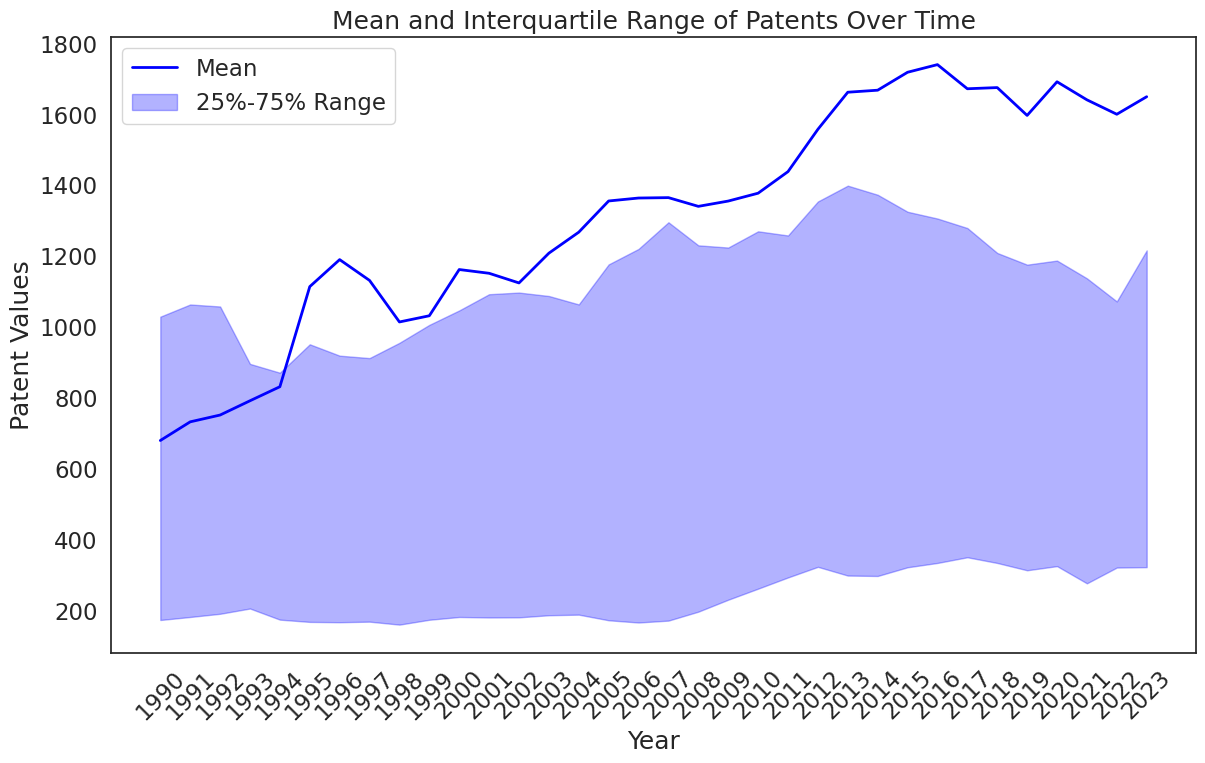

In [84]:
years = patents2_summary.columns  # Assuming years are columns
mean_values = patents2_summary.loc['mean']
min_values = patents2_summary.loc['25%']
max_values = patents2_summary.loc['75%']
plt.figure(figsize=(14, 8))
# Plot the mean values as a line
plt.plot(years, mean_values, label='Mean', color='blue', linewidth=2)

# Fill the area between the min and max values
plt.fill_between(years, min_values, max_values, color='blue', alpha=0.3, label='25%-75% Range')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Patent Values')
plt.title('Mean and Interquartile Range of Patents Over Time')
plt.xticks(rotation=45)
# Add a legend
plt.legend()

# Display the plot
plt.show()

In [75]:
pdata_1990 = patents2_df[['country','1990']]
pdata_1990_sorted= pdata_1990.sort_values(by='1990', ascending=False)
pdata_1990_sorted

,country,1990
5,South Korea,1525.9
6,Russia,1098.3
2,Finland,1054.6
8,United Kingdom,948.8
4,Poland,826.4
9,United States,817.9
1,China,312.2
0,Brazil,126.8
3,India,60.2
7,Türkiye,20.3


In [77]:
pdata_2023 = patents2_df[['country','2023']]
pdata_2023_sorted= pdata_2023.sort_values(by='2023', ascending=False)
pdata_2023_sorted

,country,2023
5,South Korea,7308.8
1,China,4875.0
2,Finland,1247.2
9,United States,1118.7
8,United Kingdom,470.5
3,India,380.5
6,Russia,363.9
7,Türkiye,308.1
4,Poland,285.8
0,Brazil,123.8


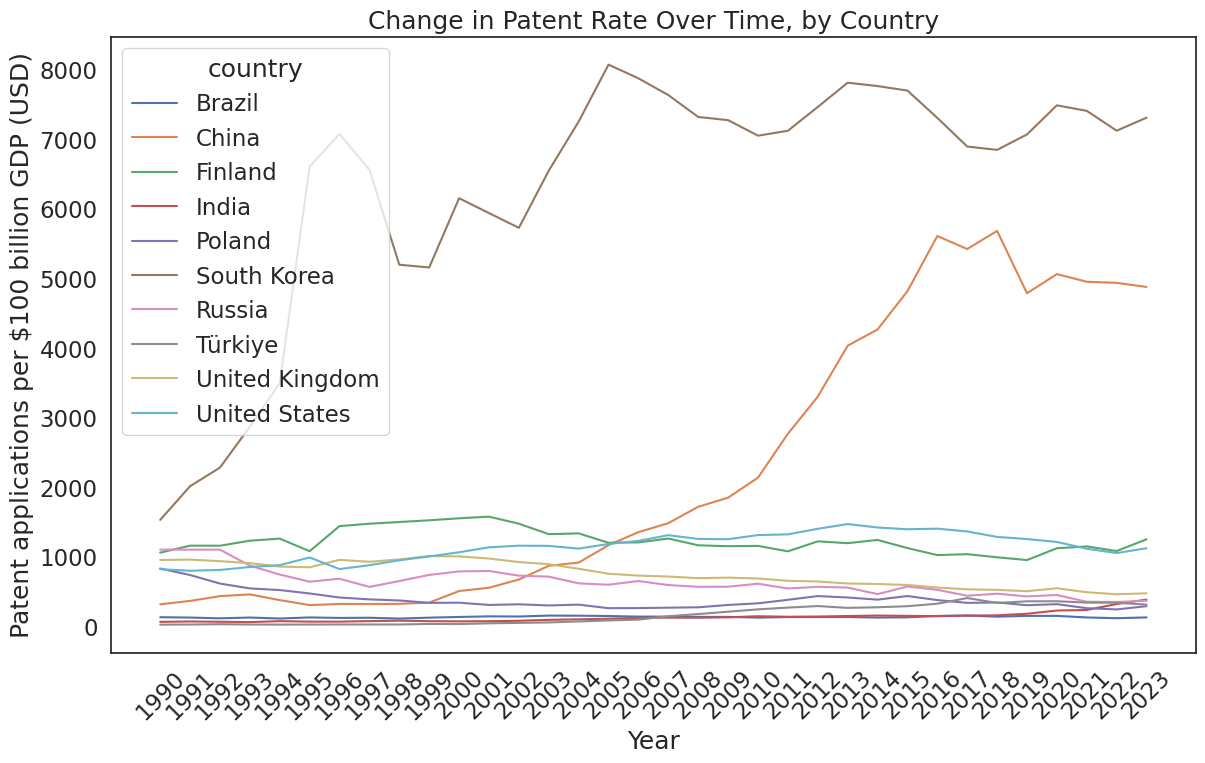

In [56]:
long_df = patents2_df.melt(id_vars=['country'], var_name='year', value_name='patents')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=long_df, x='year', y='patents', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Patent applications per $100 billion GDP (USD)')  # Label for the y-axis
plt.title('Change in Patent Rate Over Time, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [58]:
trademarks2_df=pd.read_csv('https://raw.githubusercontent.com/ella4-boop/patents/refs/heads/main/trademarks2.csv')
trademarks2_df.head(11)

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,2943.2,2956.1,2656.8,2707.9,3056.3,2900.1,2977.4,3372.2,3250.9,...,3332.9,3530.9,3850.4,4387.6,4767.5,5852.3,7212.6,9154.5,9120.3,9641.8
1,China,7312.3,7382.8,7387.1,5845.8,5204.2,5975.2,7088.2,8466.1,9258.4,...,11389.6,13420.6,16411.9,24100.6,29049.7,29169.5,34303.1,31895.3,24606.8,22380.7
2,Finland,2976.0,3361.3,4531.9,4531.9,4643.6,4281.7,4402.8,4623.8,4599.4,...,3984.3,3947.4,4219.5,3513.0,3328.3,3353.9,3812.2,3555.5,2982.3,2944.6
3,India,1538.7,1635.5,1821.1,2243.9,2220.5,2317.9,2735.9,2664.1,2521.4,...,2508.6,2908.2,2837.3,2434.2,2807.8,2925.9,3683.4,3826.1,3685.7,3613.3
4,Poland,4520.7,4522.6,4570.4,4752.0,4951.6,3983.1,3968.8,4193.0,3785.0,...,3912.3,3727.2,3954.7,3260.6,2975.5,2875.6,3073.8,3437.2,2784.5,3057.5
5,Republic of Korea,8257.4,8563.3,8571.6,8748.2,8344.4,7656.0,6952.9,6854.0,7098.3,...,7771.1,8811.8,8208.6,7853.1,8757.1,9411.8,11171.6,11915.7,10399.7,10124.7
6,Russian Federation,1863.5,2064.1,2149.8,2330.6,2276.0,2850.3,3180.3,2978.1,3082.4,...,3355.0,3108.6,3707.3,4398.7,3736.5,4425.2,6290.3,5711.5,6693.7,8691.7
7,Türkiye,7884.7,7884.7,7884.7,7884.7,8286.2,8105.9,9478.5,9478.5,11509.3,...,10367.3,9580.0,9226.9,9530.5,9075.0,10606.4,13875.6,14843.3,15897.7,12466.1
8,United Kingdom,1837.6,1891.2,2940.3,3178.8,2857.8,2911.2,2911.2,3341.6,3605.6,...,4031.5,4222.4,4381.8,4659.9,4832.4,4814.5,6717.5,6310.7,5029.3,5206.0
9,United States of America,1467.3,1555.3,1603.7,1757.1,1669.8,1553.8,1595.2,1700.0,1716.8,...,1796.3,1873.3,1841.6,1981.1,2003.4,2018.0,2463.7,2338.6,2054.9,1935.3


In [59]:
trademarks2_df['country'] = trademarks2_df['country'].replace(country_replacements)

# Check the result
trademarks2_df.head(11)

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,2943.2,2956.1,2656.8,2707.9,3056.3,2900.1,2977.4,3372.2,3250.9,...,3332.9,3530.9,3850.4,4387.6,4767.5,5852.3,7212.6,9154.5,9120.3,9641.8
1,China,7312.3,7382.8,7387.1,5845.8,5204.2,5975.2,7088.2,8466.1,9258.4,...,11389.6,13420.6,16411.9,24100.6,29049.7,29169.5,34303.1,31895.3,24606.8,22380.7
2,Finland,2976.0,3361.3,4531.9,4531.9,4643.6,4281.7,4402.8,4623.8,4599.4,...,3984.3,3947.4,4219.5,3513.0,3328.3,3353.9,3812.2,3555.5,2982.3,2944.6
3,India,1538.7,1635.5,1821.1,2243.9,2220.5,2317.9,2735.9,2664.1,2521.4,...,2508.6,2908.2,2837.3,2434.2,2807.8,2925.9,3683.4,3826.1,3685.7,3613.3
4,Poland,4520.7,4522.6,4570.4,4752.0,4951.6,3983.1,3968.8,4193.0,3785.0,...,3912.3,3727.2,3954.7,3260.6,2975.5,2875.6,3073.8,3437.2,2784.5,3057.5
5,South Korea,8257.4,8563.3,8571.6,8748.2,8344.4,7656.0,6952.9,6854.0,7098.3,...,7771.1,8811.8,8208.6,7853.1,8757.1,9411.8,11171.6,11915.7,10399.7,10124.7
6,Russia,1863.5,2064.1,2149.8,2330.6,2276.0,2850.3,3180.3,2978.1,3082.4,...,3355.0,3108.6,3707.3,4398.7,3736.5,4425.2,6290.3,5711.5,6693.7,8691.7
7,Türkiye,7884.7,7884.7,7884.7,7884.7,8286.2,8105.9,9478.5,9478.5,11509.3,...,10367.3,9580.0,9226.9,9530.5,9075.0,10606.4,13875.6,14843.3,15897.7,12466.1
8,United Kingdom,1837.6,1891.2,2940.3,3178.8,2857.8,2911.2,2911.2,3341.6,3605.6,...,4031.5,4222.4,4381.8,4659.9,4832.4,4814.5,6717.5,6310.7,5029.3,5206.0
9,United States,1467.3,1555.3,1603.7,1757.1,1669.8,1553.8,1595.2,1700.0,1716.8,...,1796.3,1873.3,1841.6,1981.1,2003.4,2018.0,2463.7,2338.6,2054.9,1935.3


In [73]:
tdata_2004 = trademarks2_df[['country','2004']]
tdata_2004_sorted= tdata_2004.sort_values(by='2004', ascending=False)
tdata_2004_sorted

,country,2004
5,South Korea,8257.4
7,Türkiye,7884.7
1,China,7312.3
4,Poland,4520.7
2,Finland,2976.0
0,Brazil,2943.2
6,Russia,1863.5
8,United Kingdom,1837.6
3,India,1538.7
9,United States,1467.3


In [74]:
tdata_2023 = trademarks2_df[['country','2023']]
tdata_2023_sorted= tdata_2023.sort_values(by='2023', ascending=False)
tdata_2023_sorted

,country,2023
1,China,22380.7
7,Türkiye,12466.1
5,South Korea,10124.7
0,Brazil,9641.8
6,Russia,8691.7
8,United Kingdom,5206.0
3,India,3613.3
4,Poland,3057.5
2,Finland,2944.6
9,United States,1935.3


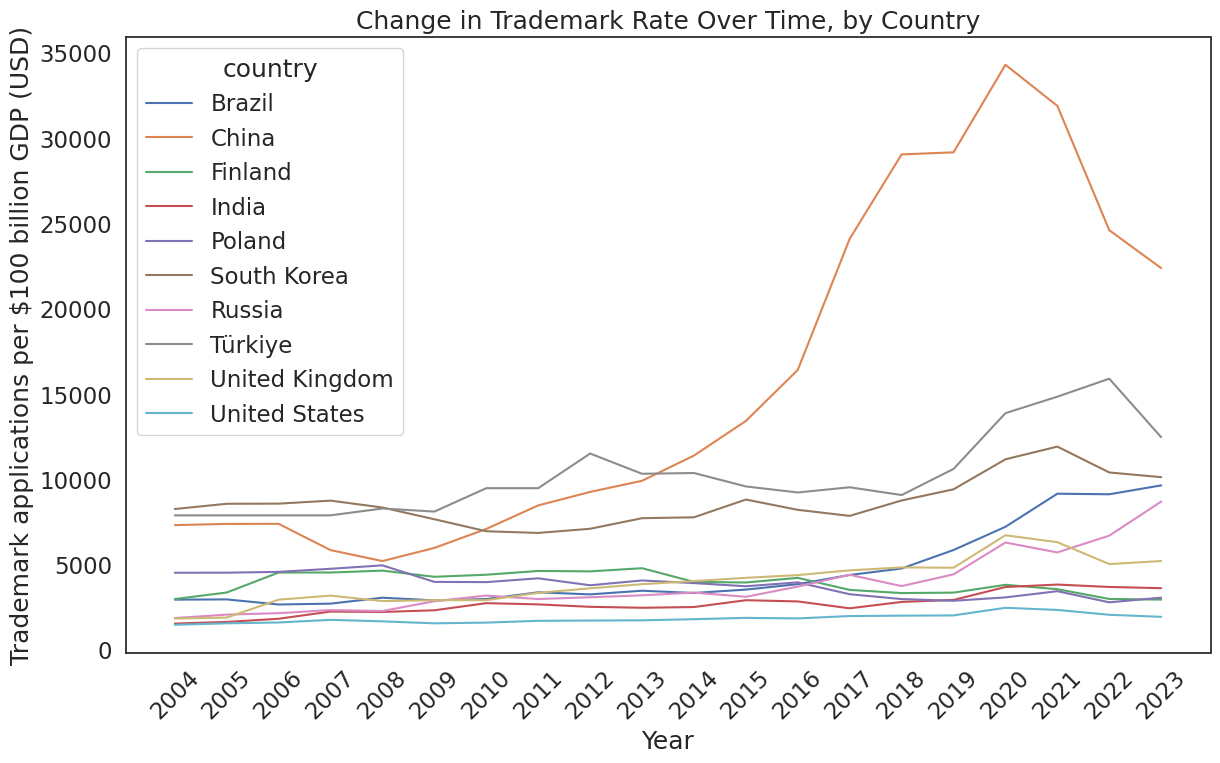

In [61]:
long2_df = trademarks2_df.melt(id_vars=['country'], var_name='year', value_name='trademarks')

# Plotting using seaborn
plt.figure(figsize=(14, 8))  # Set figure size for better visibility
sns.lineplot(data=long2_df, x='year', y='trademarks', hue='country')

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Trademark applications per $100 billion GDP (USD)')  # Label for the y-axis
plt.title('Change in Trademark Rate Over Time, by Country')  # Title of the chart

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [85]:
trademarks2_summary = trademarks2_df.describe()
trademarks2_summary

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4060.140000,4181.690000,4411.740000,4398.090000,4351.040000,4253.520000,4529.120000,4767.140000,5042.750000,5150.59000,5244.890000,5513.040000,5864.000000,6611.930000,7133.32000,7545.310000,9260.380000,9298.840000,8325.490000,8006.170000
std,2754.818318,2760.047594,2650.284929,2439.312652,2416.303673,2263.073447,2492.616153,2616.044447,3199.479156,3065.61138,3363.578231,3756.487728,4354.534266,6576.907232,8068.84313,8108.860424,9526.721843,8917.824986,7156.824998,6220.521965
min,1467.300000,1555.300000,1603.700000,1757.100000,1669.800000,1553.800000,1595.200000,1700.000000,1716.800000,1729.30000,1796.300000,1873.300000,1841.600000,1981.100000,2003.40000,2018.000000,2463.700000,2338.600000,2054.900000,1935.300000
25%,1844.075000,1934.425000,2276.550000,2424.925000,2421.450000,2862.750000,2927.750000,3068.975000,3124.525000,3262.35000,3338.425000,3214.175000,3743.075000,3323.700000,3063.70000,3032.900000,3715.600000,3623.150000,3158.150000,3196.450000
50%,2959.600000,3158.700000,3736.100000,3855.350000,3849.950000,3447.150000,3574.550000,3782.600000,3695.300000,3957.50000,3948.300000,3837.300000,4087.100000,4393.150000,4252.00000,4619.850000,6503.900000,6011.100000,5861.500000,6948.850000
75%,6614.400000,6667.750000,6682.925000,5572.350000,5141.050000,5551.825000,6315.375000,6296.450000,6473.575000,6984.72500,6836.200000,7664.450000,7251.900000,7054.800000,7775.92500,8521.925000,10181.850000,11225.400000,10079.850000,10003.975000
max,8257.400000,8563.300000,8571.600000,8748.200000,8344.400000,8105.900000,9478.500000,9478.500000,11509.300000,10322.50000,11389.600000,13420.600000,16411.900000,24100.600000,29049.70000,29169.500000,34303.100000,31895.300000,24606.800000,22380.700000
